In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv')
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data.shape

(891, 13)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [39]:
dr=['Unnamed: 0','PassengerId','Name','Ticket','Cabin']
data.drop(dr,axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [40]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [41]:
data["Embarked"] = data["Embarked"].fillna('S')
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [42]:
mean_age = data["Age"].mean()
std_age = data["Age"].std()
mean_age, std_age

(29.69911764705882, 14.526497332334044)

In [43]:
random_age = np.random.randint(mean_age-std_age, mean_age+std_age, size = 177)
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = random_age
data["Age"] = age_slice

In [44]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
genders = {"male":0, "female":1}
data["Sex"] =data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
data["Embarked"] = data["Embarked"].map(ports)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [47]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.618597,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.529687,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.500000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


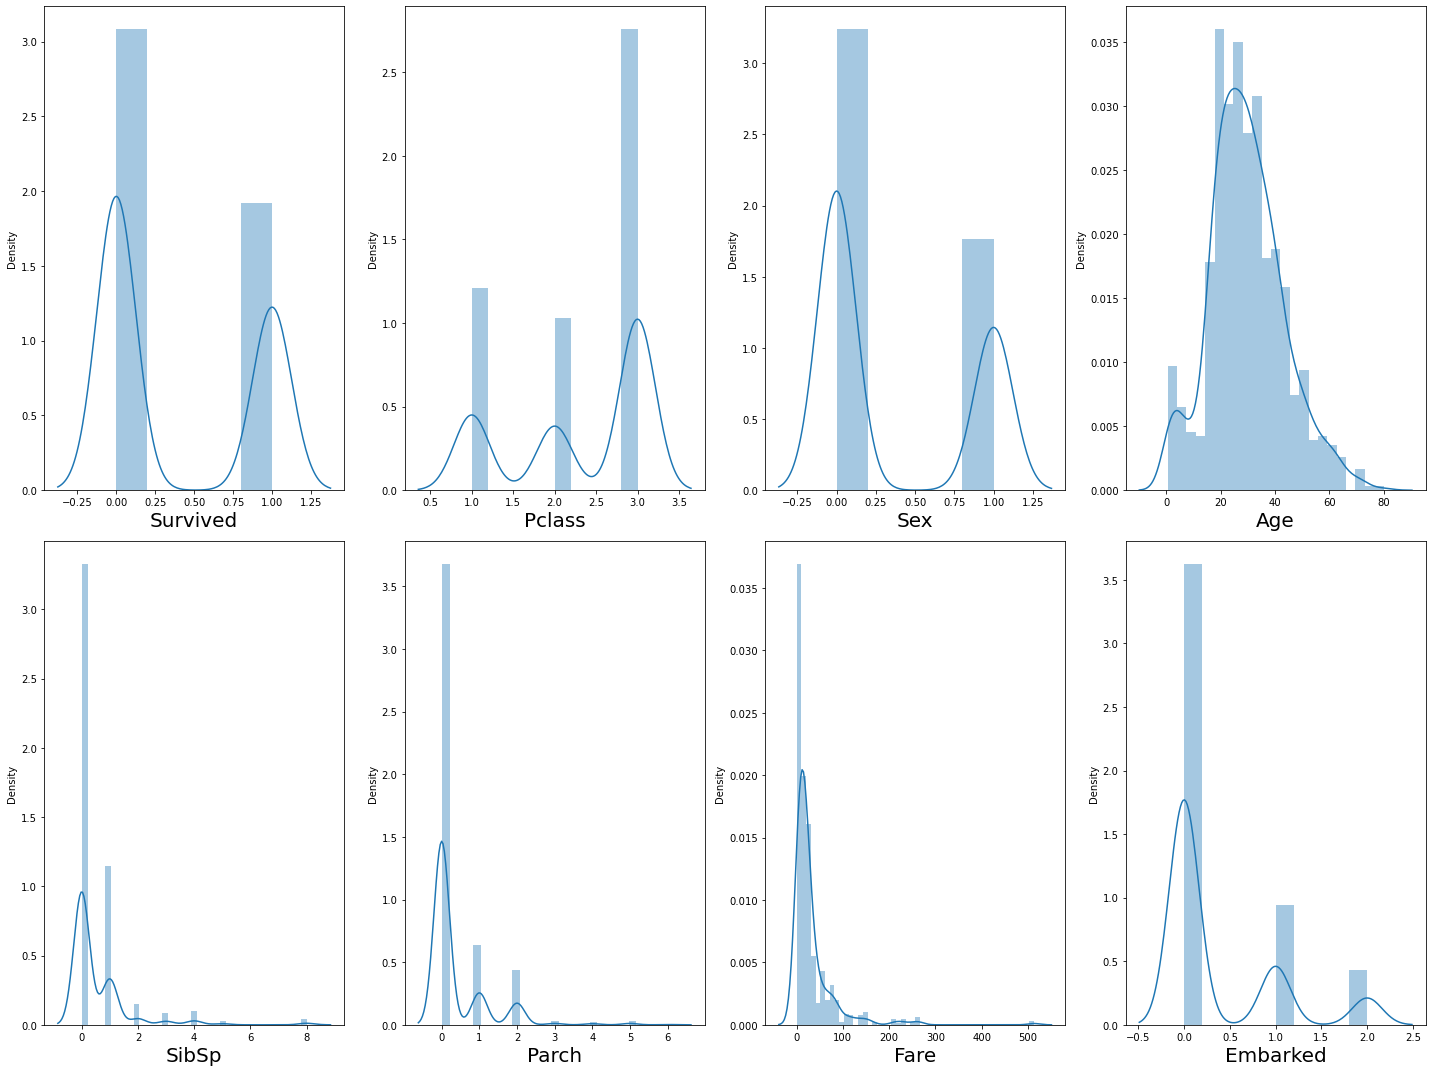

In [48]:
plt.figure(figsize = (20,15))

plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [49]:
y = data['Survived']
x = data.drop(columns = ['Survived'])

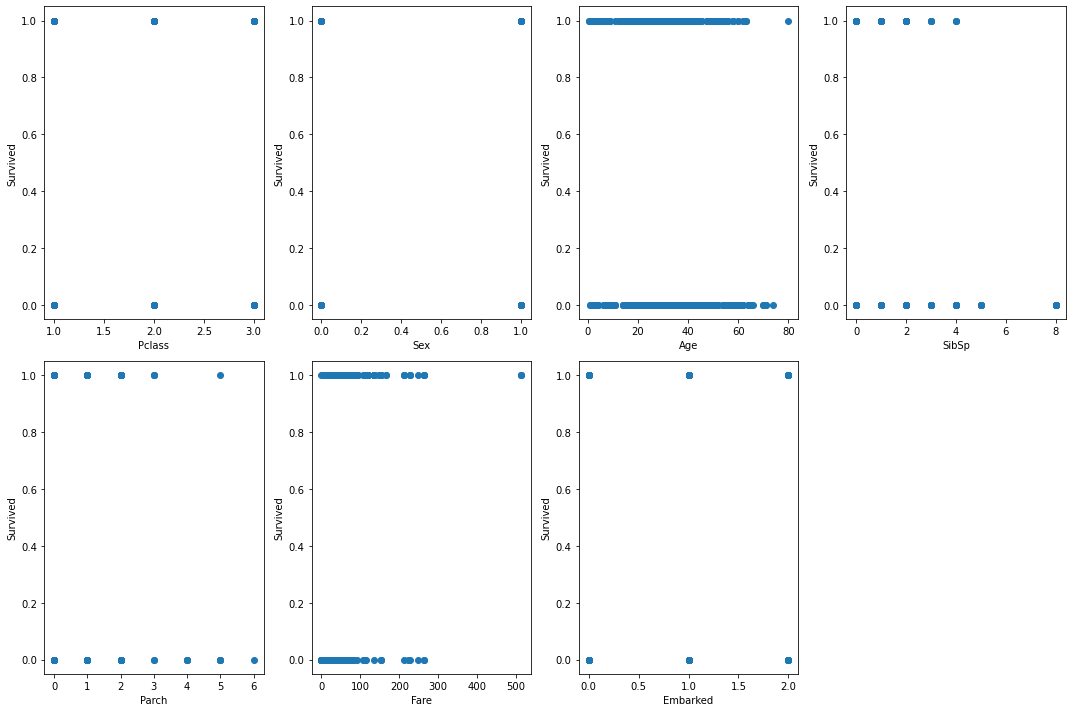

In [50]:
plt.figure(figsize = (15,10))
plotnumber = 1
for column in x:
    if plotnumber<=7:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('Survived',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=9)

In [53]:
 from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)
rfc_y_pred = clf1.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 80.44692737430168


In [54]:
from sklearn.neighbors import KNeighborsClassifier

clf2 = KNeighborsClassifier(5)
clf2.fit(x_train, y_train)
knc_y_pred = clf2.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 65.92178770949721


In [56]:
#Support Vector Machine
from sklearn import tree,svm

clf4 = svm.SVC()
clf4.fit(x_train, y_train)
svm_y_pred = clf4.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

accuracy= 63.687150837988824


In [57]:
 from sklearn.tree import DecisionTreeClassifier

clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(x_train, y_train)
dtc_y_pred = clf3.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 74.86033519553072


In [59]:
from sklearn.linear_model import LogisticRegression

clf5 = LogisticRegression(solver='liblinear')
clf5.fit(x_train, y_train)
lr_y_pred = clf5.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 77.09497206703911


In [61]:
#Accuracies of all Classifiers
print("Accuracy of Random Forest Classifier =",rfc_accuracy)
print("Accuracy of Logistic Regressor =",lr_accuracy)
print("Accuracy of K-Neighbor Classifier =",knc_accuracy)
print("Accuracy of Decision Tree Classifier = ",dtc_accuracy)
print("Accuracy of Support Vector Machine Classifier = ",svm_accuracy)

Accuracy of Random Forest Classifier = 80.44692737430168
Accuracy of Logistic Regressor = 77.09497206703911
Accuracy of K-Neighbor Classifier = 65.92178770949721
Accuracy of Decision Tree Classifier =  74.86033519553072
Accuracy of Support Vector Machine Classifier =  63.687150837988824


In [ ]:
##Since maximum accuracy score is with Random Forest Classifier so we choose it 